In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.utils import FontManager

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

from matplotlib.colors import LinearSegmentedColormap
import cmasher as cmr

In [24]:
df = pd.read_csv("mancityshots.csv")
df.head(5)

,id,minute,result,x,y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,assist,lastAction
0,426425,3,BlockedShot,0.806,0.730,0.060912,Ilkay Gündogan,a,314,DirectFreekick,2021,RightFoot,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,None,Standard
1,426426,4,MissedShots,0.923,0.491,0.256053,Fernandinho,a,614,FromCorner,2021,Head,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,Benjamin Mendy,Aerial
2,426427,5,MissedShots,0.888,0.427,0.130889,João Cancelo,a,2379,OpenPlay,2021,RightFoot,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,None,TakeOn
3,426432,33,BlockedShot,0.854,0.688,0.040807,Jack Grealish,a,675,OpenPlay,2021,RightFoot,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,None,None
4,426433,34,MissedShots,0.906,0.510,0.474224,Riyad Mahrez,a,750,OpenPlay,2021,LeftFoot,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,None,None


In [25]:
df = df.loc[df['assist'] == 'Jack Grealish']
df.head(10)

,id,minute,result,x,y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,assist,lastAction
8,426439,47,BlockedShot,0.867,0.518,0.112110,Ilkay Gündogan,a,314,OpenPlay,2021,LeftFoot,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,Jack Grealish,Pass
16,426454,83,SavedShot,0.786,0.667,0.023583,Kevin De Bruyne,a,447,OpenPlay,2021,RightFoot,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,Jack Grealish,Pass
19,426994,10,BlockedShot,0.775,0.536,0.039454,Ferrán Torres,h,6441,OpenPlay,2021,RightFoot,16387,Manchester City,Norwich,5,0,2021-08-21 14:00:00,Jack Grealish,Pass
39,428473,42,Goal,0.958,0.540,0.679827,Gabriel Jesus,h,5543,OpenPlay,2021,LeftFoot,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass
40,428474,49,SavedShot,0.920,0.645,0.113741,Bernardo Silva,h,3635,OpenPlay,2021,LeftFoot,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass
47,428481,64,BlockedShot,0.969,0.629,0.111215,Raheem Sterling,h,618,OpenPlay,2021,RightFoot,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass
49,428483,67,MissedShots,0.814,0.576,0.034858,Raheem Sterling,h,618,FromCorner,2021,RightFoot,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass
55,428489,86,BlockedShot,0.909,0.596,0.070267,Aymeric Laporte,h,2498,FromCorner,2021,LeftFoot,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass
56,428490,87,BlockedShot,0.812,0.497,0.081395,Riyad Mahrez,h,750,OpenPlay,2021,LeftFoot,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass
69,429932,42,SavedShot,0.772,0.403,0.027082,Ilkay Gündogan,a,314,OpenPlay,2021,LeftFoot,16409,Leicester,Manchester City,0,1,2021-09-11 14:00:00,Jack Grealish,Pass


In [26]:
df['x'] = pd.to_numeric(df['x'])
df['y'] = pd.to_numeric(df['y'])
df['xG'] = pd.to_numeric(df['xG'])

df['x'] = df['x']*100
df['y'] = df['y']*100


df['xx'] = df['y']
df['yy'] = df['x']

df['x'] = df['xx']
df['y'] = df['yy']

df['x'] = df['x']*.8
df['y'] = df['y']*1.2

df.head(10).reset_index()

,index,id,minute,result,x,y,xG,player,h_a,player_id,...,match_id,h_team,a_team,h_goals,a_goals,date,assist,lastAction,xx,yy
0,8,426439,47,BlockedShot,41.439999,104.039996,0.112110,Ilkay Gündogan,a,314,...,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,Jack Grealish,Pass,51.799999,86.699997
1,16,426454,83,SavedShot,53.359998,94.319998,0.023583,Kevin De Bruyne,a,447,...,16385,Tottenham,Manchester City,1,0,2021-08-15 15:30:00,Jack Grealish,Pass,66.699997,78.599998
2,19,426994,10,BlockedShot,42.879999,93.000000,0.039454,Ferrán Torres,h,6441,...,16387,Manchester City,Norwich,5,0,2021-08-21 14:00:00,Jack Grealish,Pass,53.599998,77.500000
3,39,428473,42,Goal,43.200000,114.960004,0.679827,Gabriel Jesus,h,5543,...,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass,54.000000,95.800003
4,40,428474,49,SavedShot,51.600000,110.400000,0.113741,Bernardo Silva,h,3635,...,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass,64.500000,92.000000
5,47,428481,64,BlockedShot,50.320001,116.280002,0.111215,Raheem Sterling,h,618,...,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass,62.900002,96.900002
6,49,428483,67,MissedShots,46.079999,97.680002,0.034858,Raheem Sterling,h,618,...,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass,57.599998,81.400002
7,55,428489,86,BlockedShot,47.679999,109.080002,0.070267,Aymeric Laporte,h,2498,...,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass,59.599998,90.900002
8,56,428490,87,BlockedShot,39.760001,97.439996,0.081395,Riyad Mahrez,h,750,...,16396,Manchester City,Arsenal,5,0,2021-08-28 11:30:00,Jack Grealish,Pass,49.700001,81.199997
9,69,429932,42,SavedShot,32.239999,92.639996,0.027082,Ilkay Gündogan,a,314,...,16409,Leicester,Manchester City,0,1,2021-09-11 14:00:00,Jack Grealish,Pass,40.299999,77.199997


In [34]:
df['result']

8      BlockedShot
16       SavedShot
19     BlockedShot
39            Goal
40       SavedShot
47     BlockedShot
49     MissedShots
55     BlockedShot
56     BlockedShot
69       SavedShot
70       SavedShot
76     BlockedShot
81     MissedShots
86     MissedShots
94     MissedShots
95     MissedShots
102    BlockedShot
104    MissedShots
142      SavedShot
150           Goal
155    BlockedShot
171    BlockedShot
172    BlockedShot
173    BlockedShot
174    MissedShots
175      SavedShot
257    BlockedShot
279    MissedShots
283    BlockedShot
298    BlockedShot
372    MissedShots
393      SavedShot
395    MissedShots
420    MissedShots
498      SavedShot
505    BlockedShot
515    MissedShots
526    MissedShots
528    BlockedShot
531    MissedShots
541    MissedShots
546    MissedShots
611    MissedShots
627    MissedShots
634      SavedShot
638    MissedShots
641           Goal
653    BlockedShot
657    MissedShots
659    BlockedShot
668    BlockedShot
675      SavedShot
Name: result

In [32]:
def plotShotMap():
    for index in range(len(df['x'])):
            if df['result'][index] == 'Goal': 
                plt.scatter(df['x'][index],df['y'][index], color = '#74c69d',s=df['xG'][index]*500,edgecolor='white',linewidth=2,alpha=.9)       
            else:
                plt.scatter(df['x'][index],df['y'][index], color = '#ff4d4d',s=df['xG'][index]*500,edgecolor='white',alpha=.9)

In [35]:
df1 = df.loc[df['result'] == 'Goal']
df2 = df.loc[df['result'] != 'Goal']

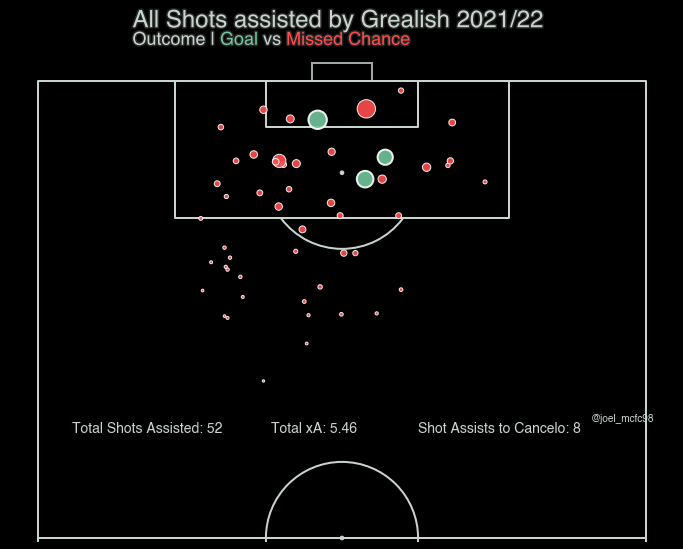

In [48]:
fig, ax = plt.subplots(figsize=(12,10))
fig.set_facecolor('#000000')
ax.patch.set_facecolor('#000000')
plt.rcParams['font.family'] = 'Helvetica'

#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb', pad_bottom=0.5,
              pitch_color='#000000', line_color='#c7d5cc', figsize=(16, 8),
              constrained_layout=False, tight_layout=True, half=True,
              goal_type='box', goal_alpha=0.8)

pitch.draw(ax=ax)
#I invert the axis to make it so I am viewing it how I want
plt.gca().invert_xaxis()
plt.scatter(df1['x'],df1['y'], color = '#74c69d',s=df1['xG']*500,edgecolor='white',linewidth=2,alpha=.9)  
plt.scatter(df2['x'],df2['y'], color = '#ff4d4d',s=df2['xG']*500,edgecolor='white',alpha=.9)

s='All Shots assisted by Grealish 2021/22'
fig_text(s=s,
        x=.27,y=.9,
        fontsize=24,
        color='#c7d5cc',
        path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig_text(x=.27,y=.87, ha='left', color='#c7d5cc',
             fontsize=18, fontweight='bold',
             s='Outcome | <Goal> vs <Missed Chance>',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()],
             highlight_textprops=[{"color": '#74c69d'},
                                  {"color": '#ff4d4d'}])

total_shots = len(df)
total_xg = '%.2f' % sum(df['xG'])
cancelo = len(df.loc[df['player']== 'João Cancelo'])

fig_text(s=f'Total Shots Assisted: {total_shots}',
        x=.20, y =.33, fontsize=14,color='#c7d5cc')

fig_text(s=f'Total xA: {total_xg}',
        x=.43, y =.33, fontsize=14,color='#c7d5cc')

fig_text(s=f'Shot Assists to Cancelo: {cancelo}',
        x=.6, y =.33, fontsize=14,color='#c7d5cc')

fig.text(.8,.33,f'@joel_mcfc98', fontstyle='italic',fontsize=10,color='#c7d5cc')

plt.savefig('grealish.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')